**Time Series untuk Prediksi Suhu Menggunakan Model LSTM**

Dataset: https://www.kaggle.com/datasets/mahirkukreja/delhi-weather-data

# **Import Library**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

from google.colab import files
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.15.0


# **Mengunduh Dataset**

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanbyu","key":"6315917ff5833a191af787ea7c399e2b"}'}

In [4]:
!mkdir DelhiWeatherData
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mahirkukreja/delhi-weather-data -p /content/DelhiWeatherData/

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 122MB/s]


In [5]:
# Mengekstraksi file zip
dataset_zip = '/content/DelhiWeatherData/delhi-weather-data.zip'
zip_ref = zipfile.ZipFile(dataset_zip, 'r')
zip_ref.extractall('/content/DelhiWeatherData')
zip_ref.close()

# **Eksplorasi Data**

In [6]:
# Menampilkan total data pada dataset (baris, kolom)
data_delhi = pd.read_csv('/content/DelhiWeatherData/testset.csv')

data_delhi.shape

(100990, 20)

In [7]:
# Menampilkan 10 data teratas
data_delhi.head(10)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [8]:
# Menampilkan 10 data terbawah
data_delhi.tail(10)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100980,20170423-15:00,Haze,18.0,0,0,NaN,32.0,NaN,1001.0,0,0,33.0,0,0,2.0,NaN,NaN,NaN,NaN,0.0
100981,20170423-18:00,Haze,19.0,0,0,NaN,41.0,NaN,1002.0,0,0,30.0,0,0,2.0,NaN,NaN,NaN,NaN,0.0
100982,20170423-21:00,Haze,14.0,0,0,NaN,30.0,NaN,1002.0,0,0,29.0,0,0,2.0,320.0,NW,NaN,NaN,14.8
100983,20170424-00:00,Haze,15.0,0,0,NaN,40.0,NaN,1004.0,0,0,26.0,0,0,2.0,290.0,WNW,NaN,NaN,11.1
100984,20170424-03:00,Haze,16.0,0,0,NaN,38.0,NaN,1006.0,0,0,28.0,0,0,4.0,0.0,North,NaN,NaN,14.8
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [9]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [10]:
# Mengecek apakah ada nilai yang kosong dari dataset
data_delhi.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

# **Preprocessing**

In [11]:
# Mengubah format tanggal pada kolom datetime_utc yang masih string menjadi format datetime
data_delhi['datetime_utc'] = pd.to_datetime(data_delhi['datetime_utc'])

In [12]:
# Menampilkan 5 data teratas untuk melihat apakah datetime_utc sudah menjadi format date time
data_delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [13]:
# Melakukan normalisasi data
median = data_delhi.loc[data_delhi[' _tempm'] < 55, ' _tempm'].median()
data_delhi.loc[data_delhi[' _tempm'] > 55, ' _tempm']=np.nan
data_delhi.fillna(median, inplace=True)

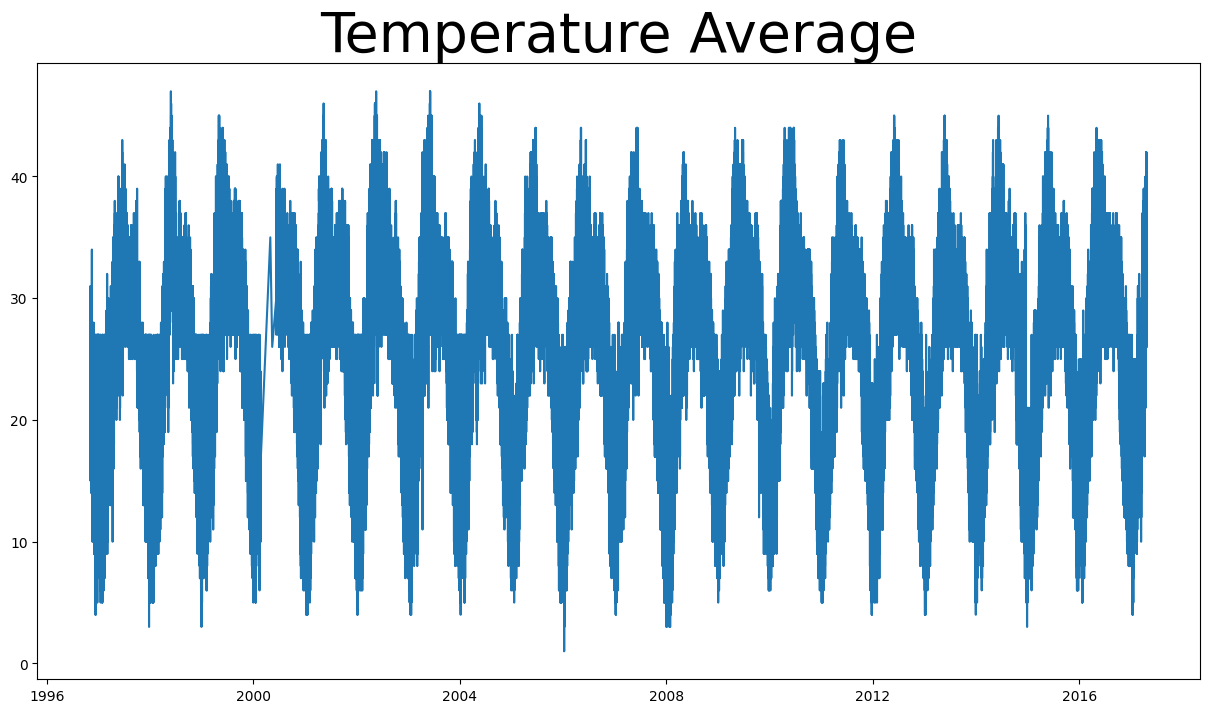

In [14]:
# Menampilkan plot unruk mengetahui jenis time series
date = data_delhi['datetime_utc'].values
tempm = data_delhi[' _tempm'].values

plt.figure(figsize=(15, 8))
plt.plot(date, tempm)
plt.title('Temperature Average',
          fontsize=40);

# **Data Splitting and Data Preparation**

In [15]:
# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(tempm, date, test_size=0.2, shuffle=False)

print('Jumlah Dataset Train  :', len(X_train))
print('Jumlah Dataset Test   :', len(X_test))

Jumlah Dataset Train  : 80792
Jumlah Dataset Test   : 20198


In [16]:
# Membuat fungsi untuk dapat mengubah data menjadi format yang dapat diterima model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

# **Pelatihan Model LSTM**

In [17]:
# Membuat arsitektur model sequential menggunakan layer LSTM
data_X_train = windowed_dataset(X_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_X_test = windowed_dataset(X_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)])

# Mengatur parameter learning rate dan optimizer
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

# Menggunakan metrik MAE pada compile
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

In [18]:
# Mengetahui berapa nilai MAE yang < 10%
MAE = (data_delhi[' _tempm'].max() - data_delhi[' _tempm'].min()) * 10 / 100

print(MAE)

4.6


In [19]:
# Penggunaan callback untuk stop pelatiihan ketika MAE < 10%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < MAE):
      self.model.stop_training = True
      print('\n')
      print('\nMae of the model is already below 10%, stopping training...')

callbacks = myCallback()

In [20]:
# Membuat variabel history agar dapat menampilkan plot loss dan plot MAE
num_epochs = 20

history = model.fit(
    data_X_train,
    epochs=num_epochs,
    validation_data=data_X_test,
    callbacks=[callbacks])

Epoch 1/20
808/808 [==============================] - 35s 30ms/step - loss: 77.8845 - mae: 78.3845 - val_loss: 43.3994 - val_mae: 43.8994
Epoch 2/20
808/808 [==============================] - 23s 28ms/step - loss: 27.1073 - mae: 27.6073 - val_loss: 10.8885 - val_mae: 11.3884
Epoch 3/20
805/808 [============================>.] - ETA: 0s - loss: 3.6745 - mae: 4.1404


Mae of the model is already below 10%, stopping training...
808/808 [==============================] - 24s 30ms/step - loss: 3.6729 - mae: 4.1388 - val_loss: 3.1343 - val_mae: 3.6037


# **Menampilkan Metrik Pelatihan dan Pengujian (Loss dan MAE)**

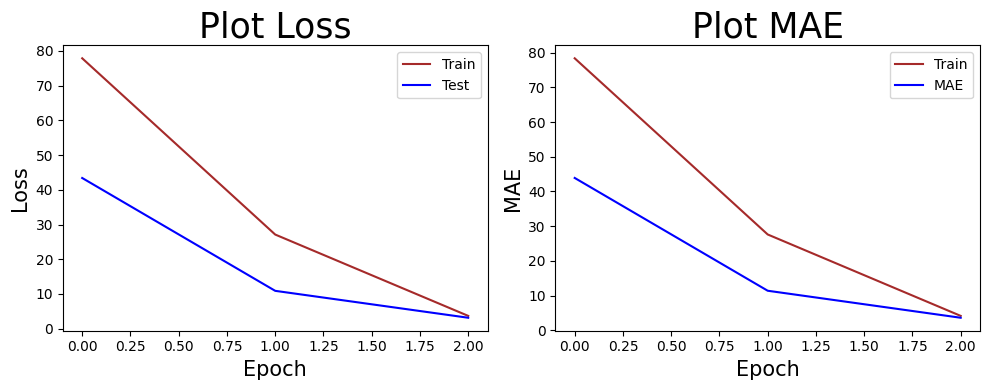

In [35]:
# Menampilkan visualisasi plot loss dan MAE
plt.figure(figsize=(10, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['loss'])),
         history.history['loss'],
         label='Train',
         color='brown')
plt.plot(range(len(history.history['val_loss'])),
         history.history['val_loss'],
         label='Test',
         color='blue')
plt.title('Plot Loss', fontsize=25)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history['mae'])),
         history.history['mae'],
         label='Train',
         color='brown')
plt.plot(range(len(history.history['val_mae'])),
         history.history['val_mae'],
         label='MAE',
         color='blue')
plt.title('Plot MAE', fontsize=25)
plt.ylabel('MAE', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


Berdasarkan hasil plot metrik training dan test (Loss dan MAE) dengan dataset Delhi Weather data, dapat disimpulkan bahwa model LSTM yang dibuat memiliki performa yang cukup baik dalam memprediksi suhu udara di Delhi.

Pada plot Loss, terlihat bahwa nilai Loss pada training set terus menurun hingga mencapai nilai yang relatif stabil. Hal ini menunjukkan bahwa model sudah mampu belajar dengan baik dari data training. Sedangkan pada plot MAE, terlihat bahwa nilai MAE pada training set juga terus menurun hingga mencapai nilai yang relatif stabil. Hal ini menunjukkan bahwa model sudah mampu memprediksi nilai suhu udara dengan cukup akurat.

Pada plot MAE untuk data test, terlihat bahwa nilai MAE cenderung stabil di sekitar 10%. Nilai MAE sebesar 10% dapat dikatakan cukup baik untuk proyek Time Series dengan dataset yang relatif kecil. Hal ini menunjukkan bahwa model sudah mampu memprediksi nilai suhu udara di Delhi dengan cukup akurat.